This notebook will download Smart-seq2 data from B cells, and then analyze the B cell receptor usage as well as gene expression.

To start we have to install a tool in Python, so this notebook begins using the Python notebook. We will then switch it to an R notebook (this does not change the files downloaded or tools installed).

In [ ]:
# Install conda for colab and use it to install trust4 - part 1
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...


In [ ]:
# Install conda for colab and use it to install trust4 - part 2 (we found that this section needs to be run separately from the top section)
import condacolab
condacolab.check()
!conda install -c bioconda trust4

✨🍰✨ Everything looks OK!
Channels:
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - trust4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    libxcrypt-4.4.36           |       hd590300_1          98 KB  conda-forge
    openssl-3.3.0              |       h4ab18f5_3         2.8 MB  conda-forge
    perl-5.32.1                | 7_hd590300_perl5        12.7 MB  conda-forge
    trust4-1.1.1               |       h43eeafb_0         4

In [ ]:
# Check that trust4 was installed properly by calling the function without inputs
!run-trust4

TRUST4 v1.1.1-r505 usage: ./run-trust4 [OPTIONS]:
Required:
	-b STRING: path to bam file
	-1 STRING -2 STRING: path to paired-end read files
	-u STRING: path to single-end read file
	-f STRING: path to the fasta file coordinate and sequence of V/D/J/C genes
Optional:
	--ref STRING: path to detailed V/D/J/C gene reference file from IMGT database. (default: not used but recommended)
	-o STRING: prefix of output files. (default: inferred from file prefix)
	--od STRING: the directory for output files. (default: ./)
	-t INT: number of threads (default: 1)
	-k INT: the starting k-mer size for indexing contigs (default: 9)
	--barcode STRING: if -b, bam field for barcode; if -1 -2/-u, file containing barcodes (default: not used)
	--barcodeLevel STRING: barcode is for cell or molecule (default: cell)
	--barcodeWhitelist STRING: path to the barcode whitelist (default: not used)
	--barcodeTranslate STRING: path to the barcode translate file (default: not used)
	--UMI STRING: if -b, bam field for 

Switch to R! This is done by clicking the small arrow in the top right corner of your screen and clicking "change runtime type"

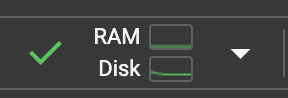

In [ ]:
# Start with section to define shell call function and install packages
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

loadPackages = function(pkgs){
  myrequire = function(...){
    suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(...))))
  }
  ok = sapply(pkgs, require, character.only=TRUE, quietly=TRUE)
  if (!all(ok)){
    message("There are missing packages: ", paste(pkgs[!ok], collapse=", "))
  }
}

## Setup R2U
download.file("https://github.com/eddelbuettel/r2u/raw/master/inst/scripts/add_cranapt_jammy.sh",
              "add_cranapt_jammy.sh")
Sys.chmod("add_cranapt_jammy.sh", "0755")
shell_call("./add_cranapt_jammy.sh")
bspm::enable()
options(bspm.version.check=FALSE)
shell_call("rm add_cranapt_jammy.sh")

45 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...
wget is already the newest version (1.21.2-2ubuntu1).
ca-certificates is already the newest version (20230311ubuntu0.22.04.1).
gnupg is already the newest version (2.2.27-3ubuntu2.1).
gnupg set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
-----BEGIN PGP PUBLIC KEY BLOCK-----

mQINBFM+sY8BEADA70T+U0/2WNjOTLvytuXLvBC4vgA8hYvOaBS1cL3d8lu4mwr4
W84/6p4v/mXle/0eIO2D2g+XfK72ZHZxpS+bb7yPxrkCDLGxwUd/khtTJHSbbKFo
J73AsABflMe+8qv+E74+QTiXErTCNioFRz18sa0EvOnEAiokau6TZVYY2z9YjBNI
yEjTi+z+g8c1RL6VmrFEpTicTpafOLbkRyw0VKnAKG7Ytp3Ksc1G9/IAoKw3Q9La
0DJb5iX6hyB7+PNid6htK4LtPKZ2dNSrnRvNNkjj5BgcM2AT1hmxbzHNzIVmPoKA
CQFrkdjog3/PcyjdtZG7cfoSDXrbIAZeAa2ngLv9C/DJatVDd6maPOe66gLo7+As
ErMvO9vtiouqLdurW+Lhx0jFW9Ca3g1taLfbSDyS3X1mOGWcisbQvBqkIuoDQTeS
V4Z04wrwTZ1HtweKG/s5fmPtZNGWVI5YNRLIwdmbGzFTMPu2XTAOd+xSK2H+46Kh
Sh4kFeP6p

Tracing function "install.packages" in package "utils"



In [ ]:
## Install the R packages
cranPkgs2Install = c("BiocManager","tximport")
install.packages(cranPkgs2Install, ask=FALSE, update=TRUE, quietly=TRUE)
system("sudo apt install libgsl-dev")
BiocManager::install("scRepertoire")
BiocManager::install("rhdf5")
install.packages('Seurat')

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.0 (2024-04-24)

Installing package(s) 'BiocVersion', 'scRepertoire'

Old packages: 'backports', 'bit', 'brio', 'broom', 'bslib', 'cachem', 'callr',
  'curl', 'data.table', 'DBI', 'dbplyr', 'devtools', 'digest', 'farver',
  'fastmap', 'fs', 'gargle', 'ggplot2', 'gh', 'gtable', 'highr', 'htmltools',
  'httr2', 'isoband', 'knitr', 'munsell', 'openssl', 'pkgbuild', 'processx',
  'ragg', 'remotes', 'rmarkdown', 'rstudioapi', 'rvest', 'S4Arrays', 'sass',
  'SparseArray', 'stringi', 'systemfonts', 'testthat', 'textshaping',
  'tidyselect', 'tinytex', 'usethis', 'whisker', 'xfun', 'xopen', 'zip',
  'codetools', 'KernSmooth', 'lattice', 'MASS', 'Matrix', 'nlme', 'survival'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("r

Use SRA toolkit to download B cell smart-seq2 data from a paper

(FYI you can look at the paper here: https://academic.oup.com/nargab/article/4/3/lqac049/6643029)

In [ ]:
# Install SRA toolkit and use to download a list of files corresponding to a Smart-seq2 dataset
shell_call("wget -q --output-document sratoolkit.tar.gz https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/3.1.0/sratoolkit.3.1.0-ubuntu64.tar.gz")
shell_call("tar -xzf sratoolkit.tar.gz")

In [ ]:
# Download fastq files in loop from reference text file of SRR names (found in SRA bioproject PRJNA783770)
# We are only downloading data for three cells to make it easy to run. Later we will download a RNA/BCR data for more than 70 cells.
shell_call('printf "SRR17042242\nSRR17042243\nSRR17042244\n" > SRR_list.txt')
shell_call("cat SRR_list.txt | while read line; do sratoolkit.3.1.0-ubuntu64/bin/fastq-dump --split-files -X 50000 $line; done")

Read 50000 spots for SRR17042242
Written 50000 spots for SRR17042242
Read 50000 spots for SRR17042243
Written 50000 spots for SRR17042243
Read 50000 spots for SRR17042244
Written 50000 spots for SRR17042244

In [ ]:
# Generate lists of fastq files which we will use as input to TRUST4
shell_call("ls -1 SRR*_1*fastq > read1_list.txt")
shell_call("ls -1 SRR*_2*fastq > read2_list.txt")

Run TRUST4 - this is the tool to take fastq files and generate VDJ contigs

In [ ]:
# First download IMGT reference file for VDJ sequences, then look at the first few lines
shell_call("wget -q --output-document human_IMGT.fa https://www.dropbox.com/scl/fi/6filvbyyz55dmo5c5khoz/human_IMGT_C.fa?rlkey=guedpgolqn7ws8e74adfpm9l1&dl=0")
shell_call("head human_IMGT.fa")

>IGHD1-1*01
GGTACAACTGGAACGAC
>IGHD1-14*01
GGTATAACCGGAACCAC
>IGHD1-20*01
GGTATAACTGGAACGAC
>IGHD1-26*01
GGTATAGTGGGAGCTACTAC
>IGHD1-7*01
GGTATAACTGGAACTAC

In [ ]:
# Run TRUST4 (the tool has a script call trust-smart-seq.pl to handle smartseq2 data)
shell_call("trust-smartseq.pl -1 read1_list.txt -2 read2_list.txt -f human_IMGT.fa -o SS2set")

In [ ]:
shell_call("ls")

condacolab_install.log
human_IMGT.fa
read1_list.txt
read2_list.txt
sample_data
sratoolkit.3.1.0-ubuntu64
sratoolkit.tar.gz
SRR17042242_1.fastq
SRR17042242_2.fastq
SRR17042243_1.fastq
SRR17042243_2.fastq
SRR17042244_1.fastq
SRR17042244_2.fastq
SRR_list.txt
SS2set_airr.tsv
SS2set_annot.fa
SS2set_report.tsv

Analyze TRUST4 output in R using scRepertoire

In [ ]:
library(scRepertoire)

Loading required package: ggplot2



In [ ]:
# Load AIRR output from TRUST4
# Read about AIRR file format https://changeo.readthedocs.io/en/stable/standard.html#airr-c-format
myAirr = read.table("SS2set_airr.tsv",sep="\t",header=T)
contig.list <- loadContigs(myAirr, format = "AIRR")

In [ ]:
head(contig.list)

,barcode,chain,reads,v_gene,d_gene,j_gene,c_gene,cdr3_nt,cdr3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,SRR17042242_1,IGH,7,IGHV4-4*08,IGHD6-19*01,IGHJ6*02,IGHG1,TGTGCGAGAGCGCCGGGTGTAACAGTGGCTGGTACGAGCTCGCCACTTTCACGCACCTACTTCGCTATGGACGTCTGG,CARAPGVTVAGTSSPLSRTYFAMDVW
4,SRR17042243_1,IGH,22,IGHV3-33*01,IGHD3-10*01,IGHJ6*02,IGHG1,TGTGCGAGAGACTTGGGCACTATGGTTCTCTACGGTATGGAGGTCTGG,CARDLGTMVLYGMEVW
5,SRR17042244_1,IGK,35,IGKV3-20*01,,IGKJ3*01,IGKC,TGTCAGCAATATGGTAGCCTAACCACTTTC,CQQYGSLTTF
1,SRR17042242_1,IGL,97,IGLV2-8*01,,IGLJ3*02,IGLC2,TGCAGCTCATATGCAGGCTACAACGGTTGGGTGTTC,CSSYAGYNGWVF
3,SRR17042243_1,IGL,126,IGLV1-44*01,,IGLJ3*02,IGLC3,TGTGCAACATGGGATGACAGCCTGGATGTTCATTGGGTGTTC,CATWDDSLDVHWVF


In [ ]:
# Run combineBCR to generate VDJ usage for each cell
combined.BCR <- combineBCR(contig.list, samples = "P1", threshold = 0.85)

In [ ]:
# Take a look at the clone calls (combined HC/LC, one per cell)
# How does this look different from the contig file?
head(combined.BCR)

,barcode,sample,IGH,cdr3_aa1,cdr3_nt1,IGLC,cdr3_aa2,cdr3_nt2,CTgene,CTnt,CTaa,CTstrict
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,P1_SRR17042242_1,P1,IGHV4-4*08.IGHD6-19*01.IGHJ6*02.IGHG1,CARAPGVTVAGTSSPLSRTYFAMDVW,TGTGCGAGAGCGCCGGGTGTAACAGTGGCTGGTACGAGCTCGCCACTTTCACGCACCTACTTCGCTATGGACGTCTGG,IGLV2-8*01.IGLJ3*02.IGLC2,CSSYAGYNGWVF,TGCAGCTCATATGCAGGCTACAACGGTTGGGTGTTC,IGHV4-4*08.IGHD6-19*01.IGHJ6*02.IGHG1_IGLV2-8*01.IGLJ3*02.IGLC2,TGTGCGAGAGCGCCGGGTGTAACAGTGGCTGGTACGAGCTCGCCACTTTCACGCACCTACTTCGCTATGGACGTCTGG_TGCAGCTCATATGCAGGCTACAACGGTTGGGTGTTC,CARAPGVTVAGTSSPLSRTYFAMDVW_CSSYAGYNGWVF,NA.IGHV4-4*08_NA.IGLV2-8*01
2,P1_SRR17042244_1,P1,NA,NA,NA,IGKV3-20*01.IGKJ3*01.IGKC,CQQYGSLTTF,TGTCAGCAATATGGTAGCCTAACCACTTTC,NA_IGKV3-20*01.IGKJ3*01.IGKC,NA_TGTCAGCAATATGGTAGCCTAACCACTTTC,NA_CQQYGSLTTF,NA.NA_NA.IGKV3-20*01
3,P1_SRR17042243_1,P1,IGHV3-33*01.IGHD3-10*01.IGHJ6*02.IGHG1,CARDLGTMVLYGMEVW,TGTGCGAGAGACTTGGGCACTATGGTTCTCTACGGTATGGAGGTCTGG,IGLV1-44*01.IGLJ3*02.IGLC3,CATWDDSLDVHWVF,TGTGCAACATGGGATGACAGCCTGGATGTTCATTGGGTGTTC,IGHV3-33*01.IGHD3-10*01.IGHJ6*02.IGHG1_IGLV1-44*01.IGLJ3*02.IGLC3,TGTGCGAGAGACTTGGGCACTATGGTTCTCTACGGTATGGAGGTCTGG_TGTGCAACATGGGATGACAGCCTGGATGTTCATTGGGTGTTC,CARDLGTMVLYGMEVW_CATWDDSLDVHWVF,NA.IGHV3-33*01_NA.IGLV1-44*01


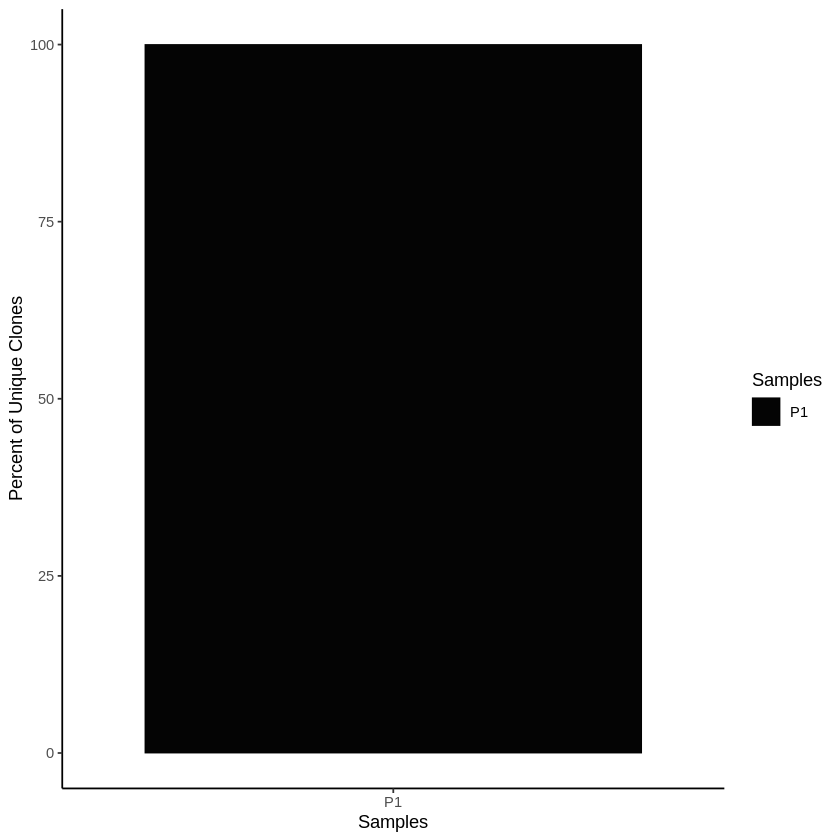

In [ ]:
# Is this the result you expected?
clonalQuant(combined.BCR, cloneCall="strict", chain = "both", scale = TRUE)

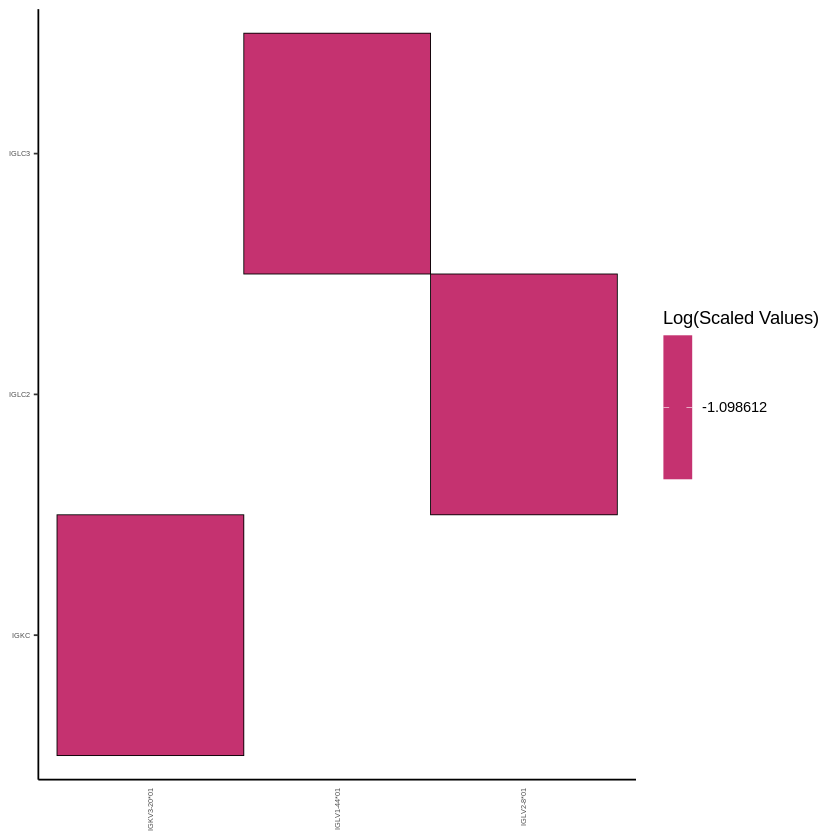

In [ ]:
vizGenes(combined.BCR,
         x.axis = "IGHV",
         y.axis = "IGHJ",
         plot = "heatmap",
         scale = TRUE)

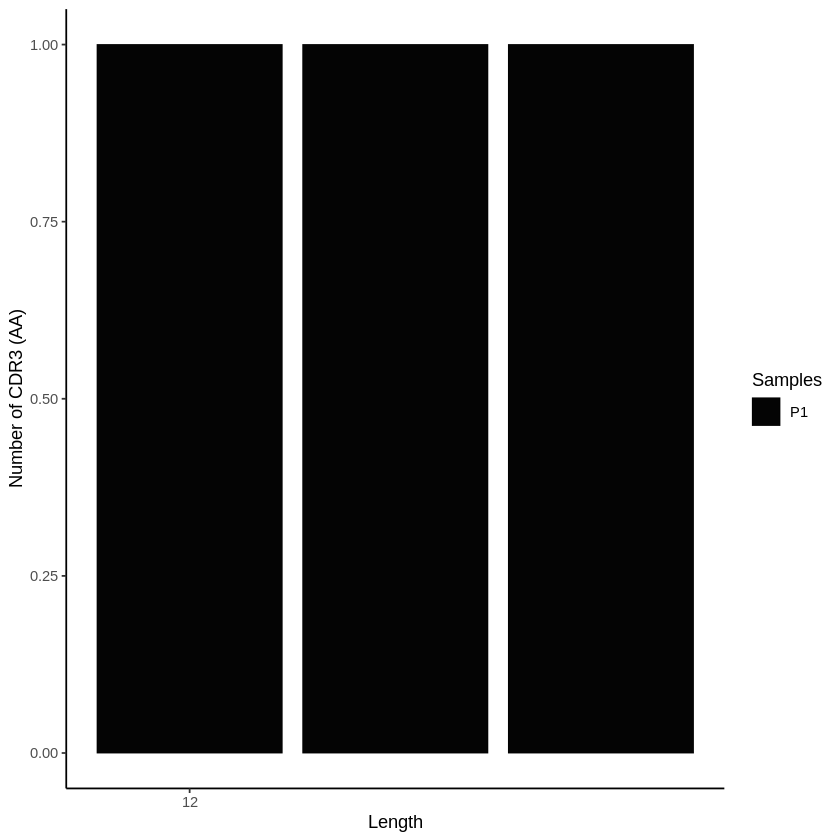

In [ ]:
clonalLength(combined.BCR, cloneCall="aa", chain = "both")

Next, we want to integrate gene expression data for each cell. We have to start by aligning the fastq reads to the transcriptome using kallisto.

In [ ]:
# Download and install kallisto
shell_call("wget https://github.com/pachterlab/kallisto/releases/download/v0.50.1/kallisto_linux-v0.50.1.tar.gz")
shell_call("tar -xf kallisto_linux-v0.50.1.tar.gz")
shell_call("cp kallisto/kallisto /usr/local/bin/")

In [ ]:
# Download and unpack human hg38 index (index.idx) for kallisto and transcripts to gene file (t2g.txt) for later generation of gene expression counts matrix
shell_call("wget -q --output-document human_index_standard.tar.xz https://github.com/pachterlab/kallisto-transcriptome-indices/releases/download/v1/human_index_standard.tar.xz")
shell_call("tar xf human_index_standard.tar.xz")

In [ ]:
# Loop through SRR_list.txt and run kallisto on each pair of corresponding fastq files to generate transcript counts
shell_call("cat SRR_list.txt | while read line; do kallisto quant -i index.idx -o kallisto_quant_${line}_out/ ${line}_1.fastq ${line}_2.fastq; done")

The next step is processing the kallisto output and converting it into a matrix of gene expression values

In [ ]:
# Load library tximport which is used to convert kallisto transcript counts to gene counts
library(tximport)

In [ ]:
# Read in transcript-gene mapping file for tximport function and take two columns (transcript IDs, gene IDs)
table_tx2gene = read.table("t2g.txt",sep="\t")[,c(1,3)]

In [ ]:
# Generate list of cell names and corresponding paths to kallisto output files
cell_names = read.table("SRR_list.txt")[,1]
cell_quant_files = paste0("kallisto_quant_",cell_names,"_out/abundance.h5")

In [ ]:
# Run tximport to import kallisto output files and convert transcript counts to gene counts
expr_genes = tximport(cell_quant_files, type = "kallisto", tx2gene = table_tx2gene)
colnames(expr_genes$counts) = cell_names

1 
2 
3 


summarizing abundance

summarizing counts

summarizing length



In [ ]:
# Explore gene counts table for most highly expressed genes (note first row is unmapped read count)
# Does these look like B cells?
ord = order(expr_genes$counts[,1],decreasing=T)
expr_genes$counts[ord[1:20],]

,SRR17042242,SRR17042243,SRR17042244
,1602.6204,1962.26776,1350.05573
CD74,1444.0000,1205.00000,1836.00000
MALAT1,809.0000,789.00000,676.00000
B2M,779.0000,922.00000,583.00000
TMSB4X,625.0000,241.00000,331.00000
MT-CO1,581.0000,704.00000,663.00000
MT-CO2,331.0000,368.00000,246.00000
HLA-DRA,262.0000,353.00000,249.00000
MS4A1,262.0000,216.00000,0.00000
MT-ND4,229.0000,391.00000,107.00000


Now we want to make a Seurat object from this data and do analysis integrating the BCR information with gene expression

In [ ]:
# Convert gene expression counts table into matrix (and skip first row which is unaligned counts)
matrix <- as.matrix(expr_genes$counts[-1,])
# Inspect the matrix
dim(matrix)
matrix[1:5,1:2]

[1] 25668     3

,SRR17042242,SRR17042243
A1BG,0,0
A1BG-AS1,0,0
A1CF,0,0
A2M,0,0
A2M-AS1,0,0


In [ ]:
# Great work generating the gene expression counts matrix
# Now we will download a larger counts matrix that was made in the same way
shell_call("wget -q --output-document SS2_Bcells_all_expr_genes.txt.gz https://www.dropbox.com/scl/fi/oevwju3kj3csufc2rkd7h/SS2_Bcells_all_expr_genes.txt.gz?rlkey=l86lbfkjxl2rqrk4ov8kbv56y&dl=0")
expr_mat = read.table("SS2_Bcells_all_expr_genes.txt.gz",header=T,sep=",")

In [ ]:
# Load Seurat and make a Seurat object
library(Seurat)
bcells <- CreateSeuratObject(counts = expr_mat, project = "SS2")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    %||%, intersect, t



Attaching package: ‘Seurat’


The following object is masked from ‘package:base’:

    %||%


Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”


In [ ]:
# Does the Seurat object have the number of cells and features that you expect?
bcells

An object of class Seurat 
25668 features across 72 samples within 1 assay 
Active assay: RNA (25668 features, 0 variable features)
 1 layer present: counts

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


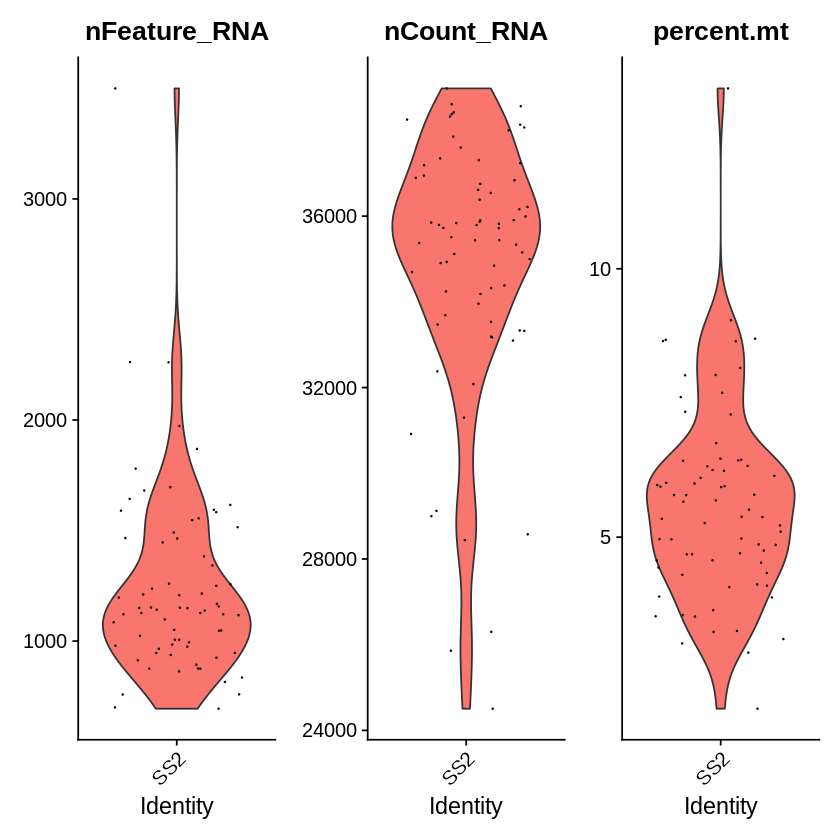

In [ ]:
# Perform standard processing of Seurat object by RNA expression quality
bcells[["percent.mt"]] <- PercentageFeatureSet(bcells, pattern = "^MT-")
VlnPlot(bcells, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [ ]:
# Do we need to filter out any cells?

In [ ]:
# Continue with normalization and variable feature selection
bcells <- NormalizeData(bcells, normalization.method = "LogNormalize", scale.factor = 10000)
bcells <- FindVariableFeatures(bcells, selection.method = "vst", nfeatures = 500)

Normalizing layer: counts

Finding variable features for layer counts



When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


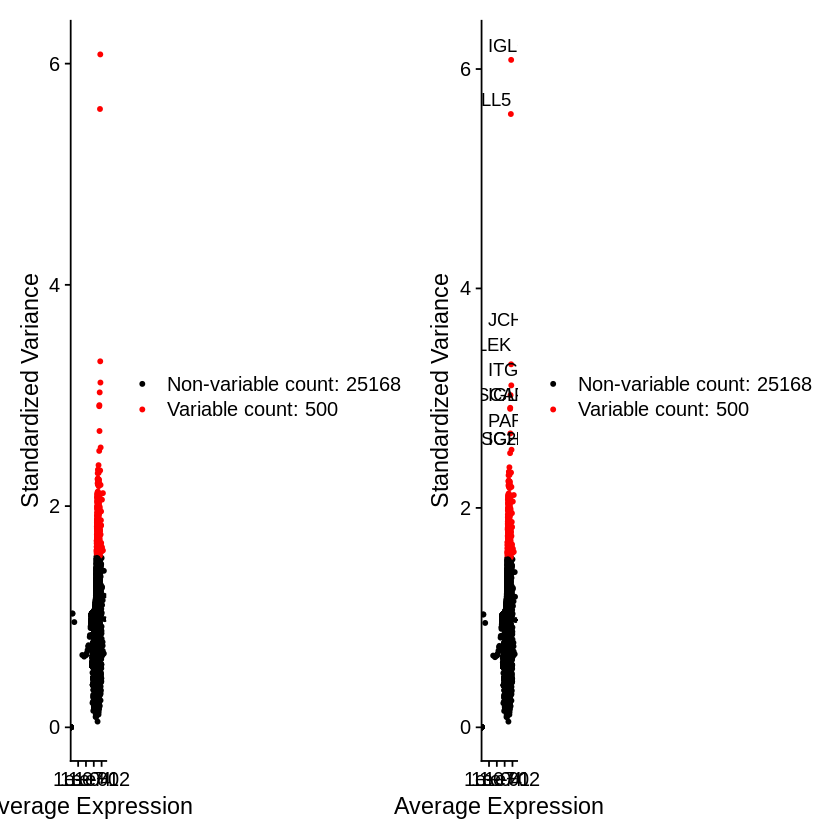

In [ ]:
# Explore variable features
top10 <- head(VariableFeatures(bcells), 10)
plot1 <- VariableFeaturePlot(bcells)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

In [ ]:
# Continue with scaling and PCA
bcells <- ScaleData(bcells, features = rownames(bcells))
bcells <- RunPCA(bcells, features = VariableFeatures(object = bcells), npcs = 20)
bcells <- RunUMAP(bcells, dims = 1:10)

Centering and scaling data matrix

PC_ 1 
Positive:  MFSD14A, RUBCNL, FAM126A, NDUFS1, NUP188, NUP62, ERVK13-1, IDH3A, RASGRP3, DDX55 
	   STAT1, ASF1A, CDK17, CORO1C, SPOP, PRKDC, TDG, TMEM154, FOXP1, NUP93 
	   LAP3, INTS6L, PTCD3, ENTPD1, ARL8B, PRKACB, IGLL5, YARS1, RNF6, IGLC1 
Negative:  IGHA1, AGK, WDPCP, COPS2, ZCCHC8, MT-CYB, ABLIM1, YTHDF2, PMPCB, TTC19 
	   ATP2B1, CSTF1, ITGB2, EPM2A-DT, UBE2G1, THOC1, SNAP23, UBE3A, LYN, PSMD2 
	   SNAPC5, FASTKD2, DCLRE1C, IGKC, ZNF600, CREBRF, P2RX5, ACTR3, ZNF224, ACTB 
PC_ 2 
Positive:  SLC25A38, NBPF14, ABHD13, IGKV1-5, FBXO21, IGHA1, TNFAIP8, PTCD3, BLZF1, HCP5 
	   RNF168, PSMB4, RABL3, TBC1D15, IFI16, DNAJB9, MUL1, PAK1IP1, THOC1, CLK4 
	   TMEM154, ZNF287, STX2, FCRL3, MCU, DCUN1D4, SPOPL, TSPAN33, WDPCP, SNAP23 
Negative:  RO60, CREBRF, NCBP3, EPM2A-DT, USP9Y, LCP1, KIAA1109, LSG1, TMEM214, ENOX2 
	   RECQL, IGHG2, ABLIM1, ATP6AP2, SF3B1, TXNDC5, DKC1, HUWE1, KLF10, CLINT1 
	   CAPN2, ARHGAP25, COPS2, ZNF600, AGK, CEP97, GAPVD1, 

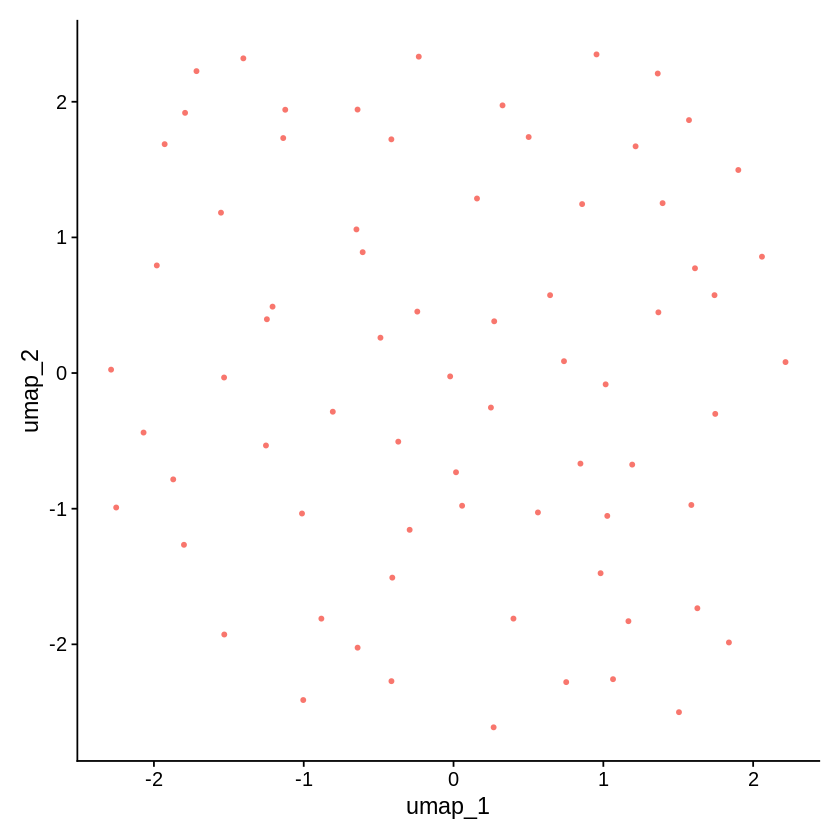

In [ ]:
# Check PCA
DimPlot(bcells, reduction = "umap") + NoLegend()

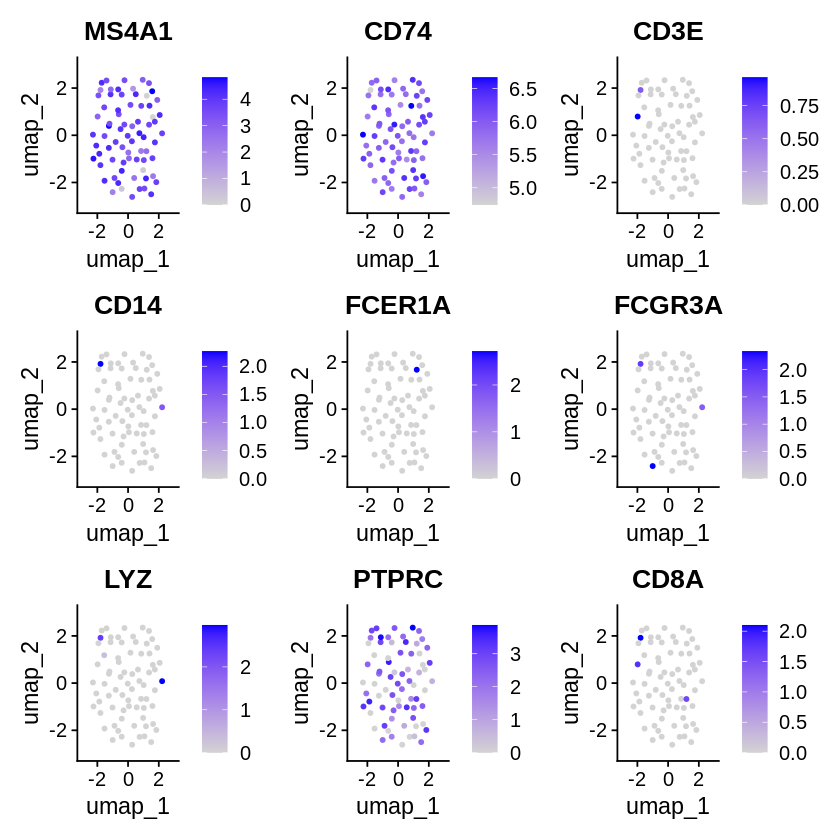

In [ ]:
# Do cells express the genes you expect?
FeaturePlot(bcells, features = c("MS4A1", "CD74", "CD3E", "CD14", "FCER1A", "FCGR3A", "LYZ", "PTPRC","CD8A"))

Now that we have a Seurat object, let's make another scRepertoire object that contains BCR information for more than 3 cells

In [ ]:
# Create scRepertoire object from all cells
shell_call("wget -q --output-document SS2all_airr.tsv https://www.dropbox.com/scl/fi/af8bmhb93h387hpohon8i/SS2all_airr.tsv?rlkey=e91dog9d3bbne8x9nfsiand18&dl=0")
myAirr = read.table("SS2all_airr.tsv",sep="\t",header=T)
contig.list <- loadContigs(myAirr, format = "AIRR")
combined.BCR <- combineBCR(contig.list, samples = "P1", threshold = 0.85)

In [ ]:
# Adjust cell names (barcodes) in scRepertoire object to match Seurat object
# Check these barcodes by eye - do they match?
screp_bc_clean = sub("P1_","",combined.BCR$P1$barcode)
combined.BCR$P1$barcode = sub("_1","",screp_bc_clean)
head(combined.BCR$P1$barcode)

[1] "SRR17042250" "SRR17042242" "SRR17042292" "SRR17042300" "SRR17042311"
[6] "SRR17042289"

In [ ]:
# Integrate BCR data into Seurat object as metadata
bcells = combineExpression(combined.BCR,bcells,cloneCall="gene")

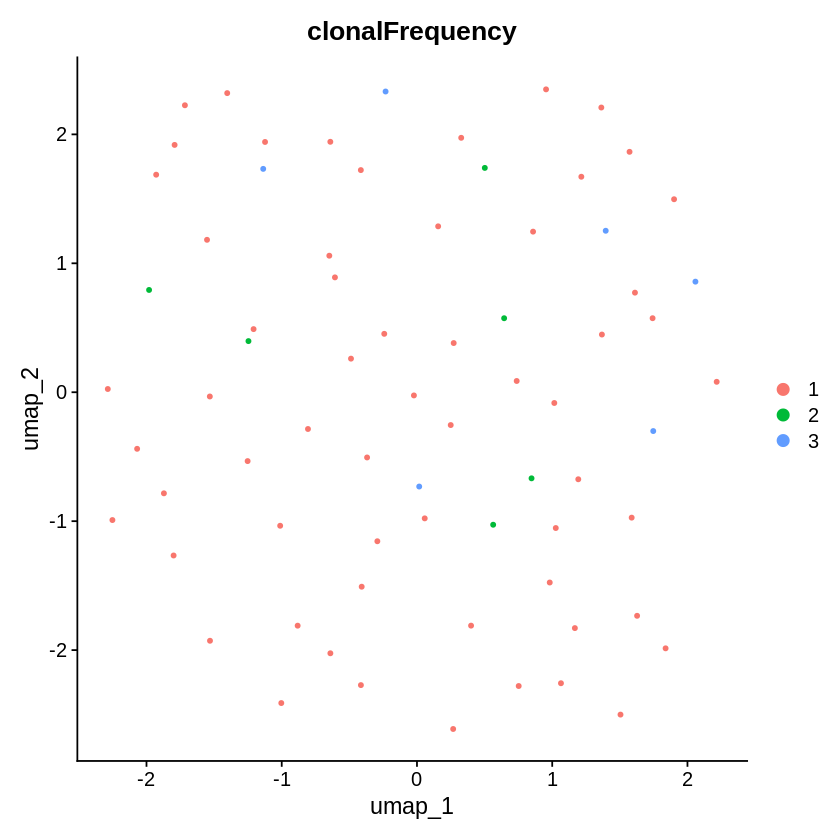

In [ ]:
# Plot UMAP dimensionality reduction and label cells by total number of cells in clone
DimPlot(bcells, group.by = "clonalFrequency")

In [ ]:
# Do the cells from expanded clones have unique gene expression from the cells that are not expanded?
# Perform differential expression testing to see if there are any differences (this is more sensitive than just looking at the UMAP)